# Tarea 3

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import Boltzmann

Extraimos los datos del primer circuito en un dataframe

In [46]:
df=pd.read_table('circuito1.txt',header=0)
df

,v1,V(n001),V(n002),I(D1)
0,0.0,0.0,0.000000,0.000000e+00
1,0.1,0.1,0.000020,2.036700e-08
2,0.2,0.2,0.000205,2.045907e-07
3,0.3,0.3,0.001813,1.813641e-06
4,0.4,0.4,0.012913,1.291275e-05
5,0.5,0.5,0.050816,5.081596e-05
6,0.6,0.6,0.114119,1.141195e-04
7,0.7,0.7,0.190767,1.907880e-04
8,0.8,0.8,0.274288,2.742902e-04
9,0.9,0.9,0.361559,3.617043e-04


Graficamos

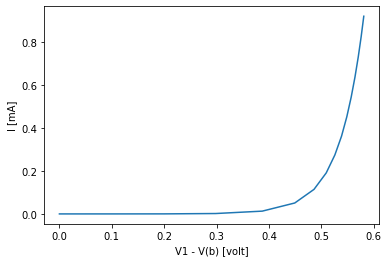

In [62]:
V = df['v1']-df['V(n002)']
I = df['I(D1)']
plt.plot(V, 1000*I)
plt.xlabel('V1 - V(b) [volt]')
plt.ylabel('I [mA]')
plt.show()

Definimos la funcion para realiza el ajuste y graficamos

In [67]:
# Constantes:
K = 8.617333262*(10**-5)
q = -1.602176634*(10**-19) # Coulomb

def corriente_I(V, I0,T):
    return I0 * (np.exp((q*V)/(K*T))-1)

I_fit, cov = curve_fit(corriente_I , V, I)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


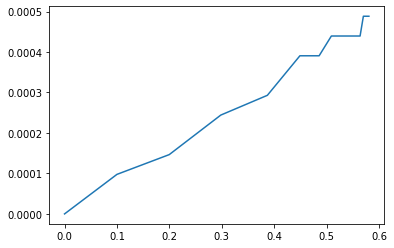

In [68]:
plt.plot(V, corriente_I(V, I_fit[0], I_fit[1]))